In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Samples

In [3]:
samples_fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_45/interim_samples_451_plus.npz"

In [4]:
ds = load_dataset(samples_fpath)

In [5]:
ds['hyper']

{'sigma_loghlr': array(0.05),
 'sigma_e_int': array(0.3),
 'mean_loghlr': array(-0.4),
 'g2': array(0.),
 'shape_noise': array(0.2),
 'sigma_logflux': array(0.4),
 'g1': array(0.02),
 'mean_logflux': array(2.45),
 'a_logflux': array(14.)}

In [6]:
ds.keys()

dict_keys(['samples', 'hyper', 'truth'])

In [7]:
ds['truth'].keys()

dict_keys(['e1', 'lhlr', 'e2', 'x', 'lf', 'y'])

In [8]:
ds['samples']['lf'].shape, ds['samples']['e1'].shape, ds['samples']['dx'].shape

((60000, 300), (60000, 300), (60000, 300))

## Check interim sample chains

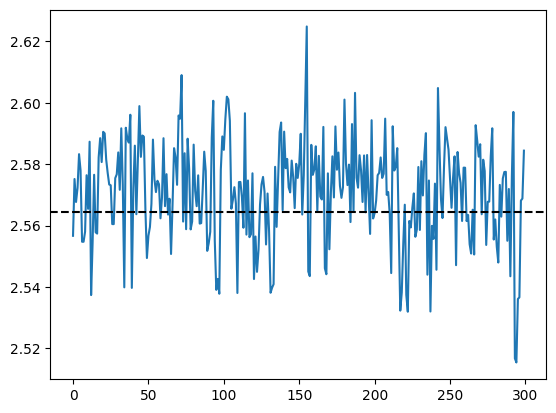

In [9]:
plt.plot(ds['samples']['lf'][111, :])
plt.axhline(ds['truth']['lf'][111], c='k', ls='--')

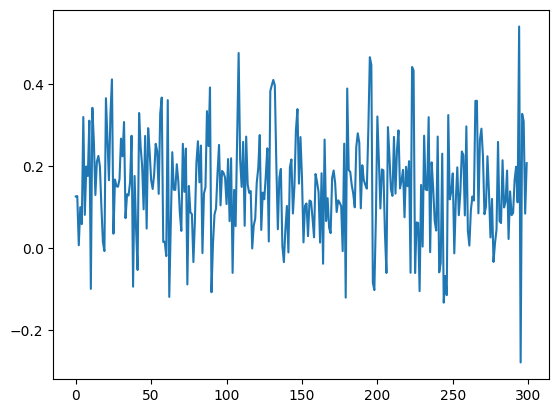

In [10]:
plt.plot(ds['samples']['dx'][1, :])

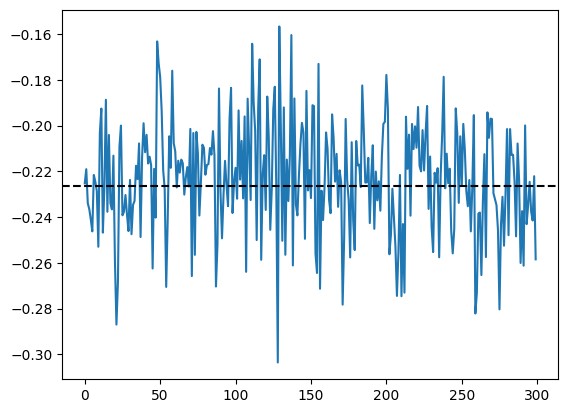

In [11]:
plt.plot(ds['samples']['e1'][11, :])
plt.axhline(ds['truth']['e1'][11], c='k', ls='--')

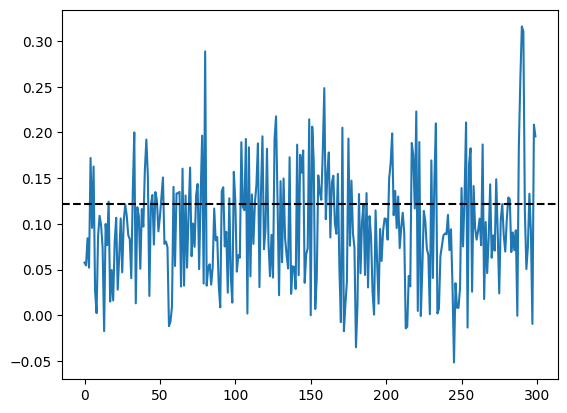

In [12]:
plt.plot(ds['samples']['e2'][5, :])
plt.axhline(ds['truth']['e2'][5], c='k', ls='--')

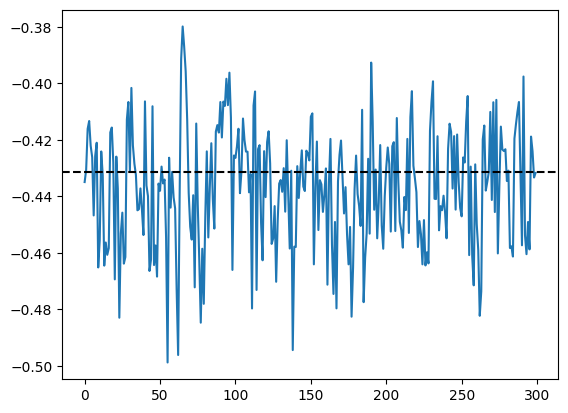

In [13]:
plt.plot(ds['samples']['lhlr'][79, :])
plt.axhline(ds['truth']['lhlr'][79], c='k', ls='--')

## Log fluxes and truncated prior

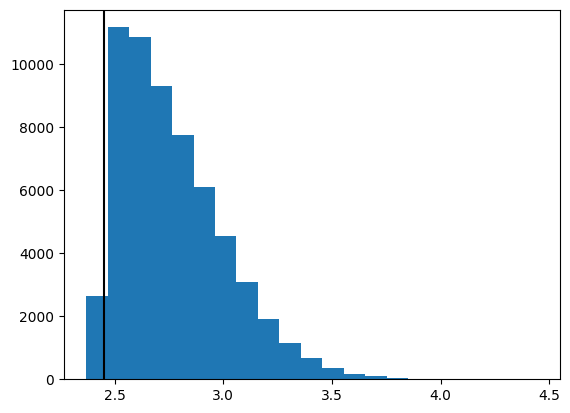

In [14]:
#true flux histogram 
tlf = ds['truth']['lf']
plt.hist(tlf, bins=21)
plt.axvline(2.45,c='k')

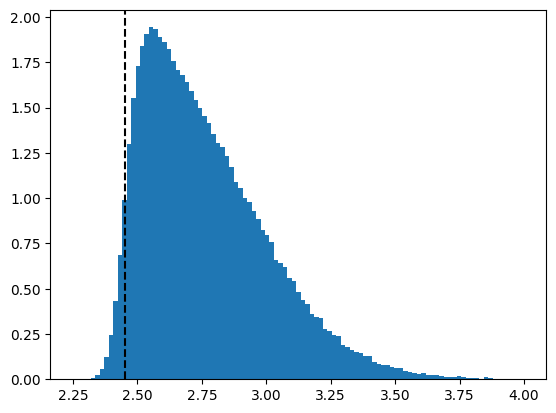

In [15]:

lf = ds['samples']['lf'].ravel()
plt.axvline(2.45,c='k', ls='--')
plt.hist(lf, bins=101, density=True, range=(2.25, 4.0));



# Shear

In [69]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_45/g_samples_452_plus.npy"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_45/g_samples_452_minus.npy"

In [70]:
gp = np.load(pfpath)
gm = np.load(mfpath)

In [71]:
gp.shape, gm.shape

((3000, 2), (3000, 2))

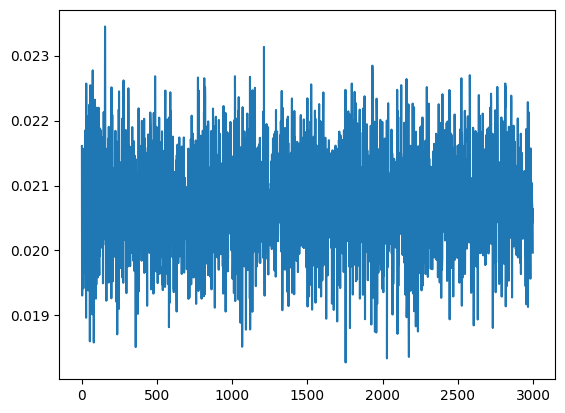

In [72]:
plt.plot(gp[:, 0])

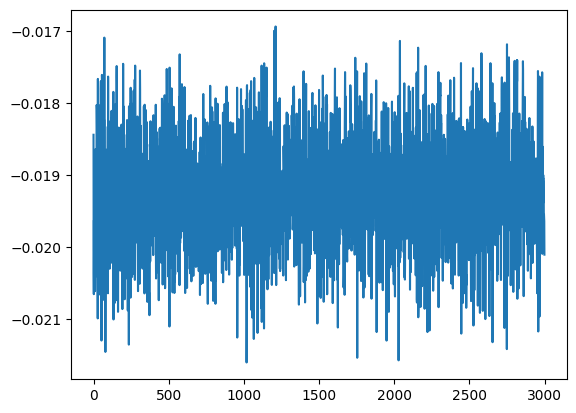

In [73]:
plt.plot(gm[:, 0])

In [74]:
gp.shape

(3000, 2)

In [75]:
m = (gp[:, 0].mean() - gm[:, 0].mean()) / 2 / 0.02 - 1
c = (gp[:, 1].mean() + gm[:, 1].mean()) / 2
m, c

(np.float64(0.00020468963583653021), np.float64(-0.0007546858863106166))

In [1]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/g_samples_boots_443.npz"

In [3]:
ds = load_dataset(fpath)

In [4]:
ds.keys()

dict_keys(['minus', 'plus'])

In [5]:
ds['plus'].keys()

dict_keys(['g2', 'g1', 'sigma_e'])

In [6]:
ds['plus']['g1'].shape, ds['plus']['sigma_e'].shape

((202, 1000), (202, 1000))

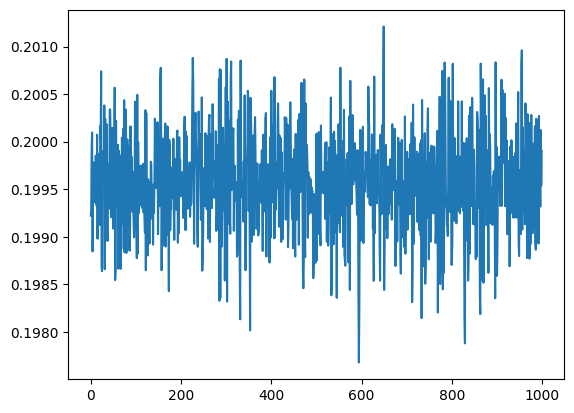

In [23]:
plt.plot(ds['plus']['sigma_e'][5])

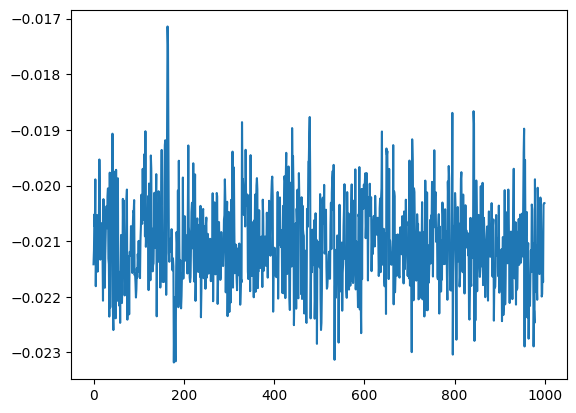

In [8]:
plt.plot(ds['minus']['g1'][0])

In [10]:
gp1 = ds['plus']['g1']
gm1 = ds['minus']['g1']

In [12]:
gp1.shape, gm1.shape

((202, 1000), (202, 1000))

In [14]:
mboot = (
    gp1.mean(axis=1) - gm1.mean(axis=1)
) / 2 / 0.02 - 1

(array([ 8.,  8., 13., 34., 37., 37., 36., 19.,  8.,  2.]),
 array([0.01684165, 0.01721554, 0.01758943, 0.01796332, 0.01833721,
        0.0187111 , 0.01908499, 0.01945887, 0.01983276, 0.02020665,
        0.02058054]),
 <BarContainer object of 10 artists>)

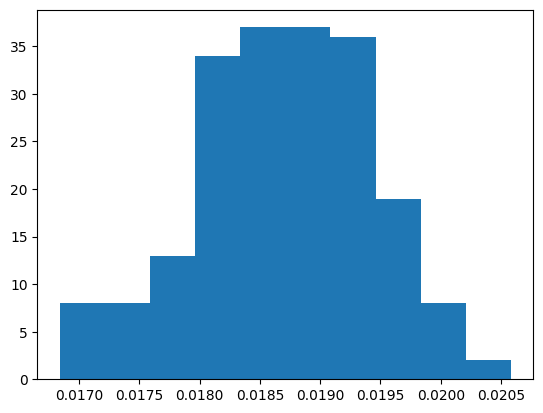

In [16]:
plt.hist(gp1.mean(axis=1))

(array([ 8.,  4., 11., 29., 52., 55., 23., 10.,  6.,  4.]),
 array([-0.00303344, -0.00258045, -0.00212746, -0.00167447, -0.00122148,
        -0.00076849, -0.0003155 ,  0.00013749,  0.00059048,  0.00104347,
         0.00149646]),
 [<matplotlib.patches.Polygon at 0x7f91fd8e57f0>])

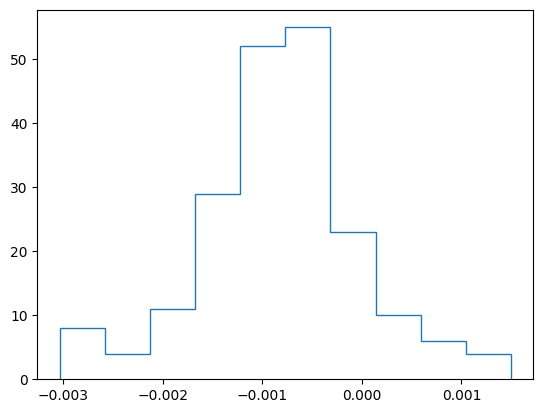

In [17]:
plt.hist(mboot, histtype='step')

In [59]:
# mboot.mean(), mboot.std()

# Alternative method of estimating errors

In [76]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [77]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_45/g_samples_454_errs.npz"

In [78]:
ds = load_dataset(fpath)

In [80]:
gps = ds['gp']
gps.shape

(500, 1000, 2)

In [81]:
gms = ds['gm']
gms.shape

(500, 1000, 2)

In [82]:
ms = (gps.mean(1)[:, 0] - gms.mean(1)[:, 0]) / 2/ 0.02  - 1
cs = (gps.mean(1)[:, 0] + gms.mean(1)[:, 0]) / 2
ms.shape, cs.shape

((500,), (500,))

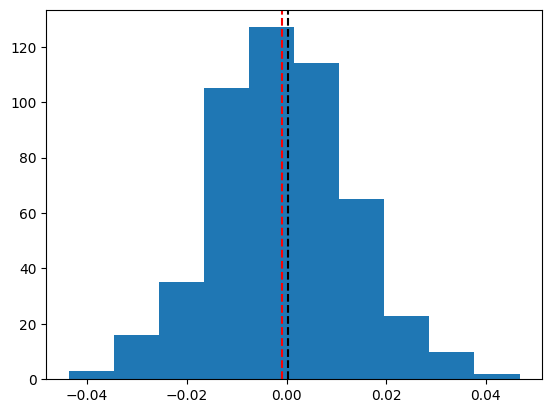

In [84]:
plt.hist(ms)
plt.axvline(m, c='k', ls='--')
plt.axvline(ms.mean(), c='r', ls='--')

In [85]:
ms.mean(), m

(np.float64(-0.0008917620901997803), np.float64(0.00020468963583653021))

In [86]:
ms.std() / np.sqrt(len(ms))

np.float64(0.0006283302234058338)

In [87]:
cs.mean(), c, cs.std() / np.sqrt(len(cs))

(np.float64(0.0007240823674257005),
 np.float64(-0.0007546858863106166),
 np.float64(0.0007800139885074273))